In [ ]:
#kutuphaneler
import torch 
from torch import nn
import math
import matplotlib.pyplot as plt

In [ ]:
#random sayi
torch.manual_seed(111)

In [ ]:
#egitim verilerinin hazırlanması

train_data_lenght=1024
train_data=torch.zeros((train_data_lenght,2))
#1024 satir 2 sutunlu 0 lar matrisi
train_data[:,0]=2*math.pi*torch.rand(train_data_lenght)
#ilk sutuna 0-2pi arasında random degerler
train_data[:,1]=torch.sin(train_data[:,0])
#2. sutuna ilk sutun degerlerinin sinüsü
train_labels=torch.zeros(train_data_lenght)
train_set=[(train_data[i],train_labels[i]) for i in range(train_data_lenght)]
#train_set dizisi

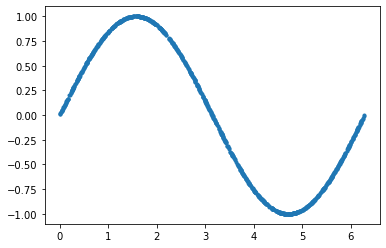

In [ ]:
plt.plot(train_data[:,0],train_data[:,1],".")

In [ ]:
batch_size=32
train_loader=torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True)
#train_setteki verileri karşılastıracak ve train yapacak 32 örneklik train_loader

Discriminator Implamentasyonu

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256), #2 boyutlu,256 noron
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128), #128 noron
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64), #64 noron
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1), #Tek noron/çıktı
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
#discriminator baslatma
discriminator=Discriminator()

Generator Implementasyonu

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
#generator baslatma
generator=Generator()

Modelin Egitimi

In [ ]:
lr=0.001 #ögrenme orani
num_epochs=300 #egitim sayisi
loss_function=nn.BCELoss()

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(),lr=lr) #Adam algoritması
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr) #optimizasion

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1)) #1 degerli etiketler
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples) #generatorun beslenmesi
        generated_samples_labels = torch.zeros((batch_size, 1)) #generatorun beslenmesi
        all_samples = torch.cat((real_samples, generated_samples)) #olusan etiketlere 0 atanması
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels) #etiketlerin birlesimi 
        )

        # Training the discriminator
        discriminator.zero_grad() #gradyan temizligi
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward() #agirlik güncellemesi için gradyan hesabı
        optimizer_discriminator.step()

        # gener. egitim verileri
        latent_space_samples = torch.randn((batch_size, 2))

        # gener. egitimi
        generator.zero_grad() #gradient temizligi
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples) #outputlarla disc beslenmesi
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # kayıplar
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.2777519226074219
Epoch: 0 Loss G.: 2.479822874069214
Epoch: 10 Loss D.: 0.6976768374443054
Epoch: 10 Loss G.: 1.0228482484817505
Epoch: 20 Loss D.: 0.5322899222373962
Epoch: 20 Loss G.: 0.7786505222320557
Epoch: 30 Loss D.: 0.6169901490211487
Epoch: 30 Loss G.: 1.1677546501159668
Epoch: 40 Loss D.: 0.5698204040527344
Epoch: 40 Loss G.: 0.9936011433601379
Epoch: 50 Loss D.: 0.5979540348052979
Epoch: 50 Loss G.: 1.016742467880249
Epoch: 60 Loss D.: 0.7142415046691895
Epoch: 60 Loss G.: 0.7656229138374329
Epoch: 70 Loss D.: 0.7212836146354675
Epoch: 70 Loss G.: 0.9131929874420166
Epoch: 80 Loss D.: 0.6145780682563782
Epoch: 80 Loss G.: 0.8710252046585083
Epoch: 90 Loss D.: 0.759217381477356
Epoch: 90 Loss G.: 0.877991259098053
Epoch: 100 Loss D.: 0.7274193167686462
Epoch: 100 Loss G.: 0.6492547988891602
Epoch: 110 Loss D.: 0.6562544703483582
Epoch: 110 Loss G.: 0.8301516175270081
Epoch: 120 Loss D.: 0.6537683606147766
Epoch: 120 Loss G.: 0.7710025906562805
Epoch: 130 L

In [ ]:
#rastgele örnekler alma
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

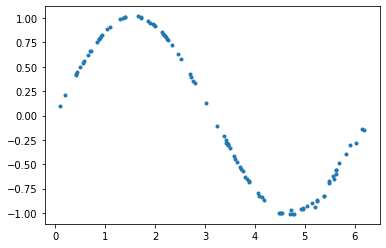

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")